<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RNN原理" data-toc-modified-id="RNN原理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><code>RNN</code>原理</a></span><ul class="toc-item"><li><span><a href="#SimpleRNN" data-toc-modified-id="SimpleRNN-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>SimpleRNN</code></a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>LSTM</code></a></span><ul class="toc-item"><li><span><a href="#LSTM原理" data-toc-modified-id="LSTM原理-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span><code>LSTM</code>原理</a></span></li><li><span><a href="#LSTM结构" data-toc-modified-id="LSTM结构-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>LSTM</code>结构</a></span></li><li><span><a href="#peephole机制" data-toc-modified-id="peephole机制-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>peephole</code>机制</a></span></li></ul></li><li><span><a href="#GRU" data-toc-modified-id="GRU-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>GRU</code></a></span></li></ul></li><li><span><a href="#RNN实现" data-toc-modified-id="RNN实现-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>RNN</code>实现</a></span><ul class="toc-item"><li><span><a href="#SimpleRNN层" data-toc-modified-id="SimpleRNN层-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>SimpleRNN</code>层</a></span></li><li><span><a href="#LSTM层" data-toc-modified-id="LSTM层-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><code>LSTM</code>层</a></span></li><li><span><a href="#GRU层" data-toc-modified-id="GRU层-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><code>GRU</code>层</a></span></li><li><span><a href="#RNN训练流程" data-toc-modified-id="RNN训练流程-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><code>RNN</code>训练流程</a></span><ul class="toc-item"><li><span><a href="#训练数据" data-toc-modified-id="训练数据-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>训练数据</a></span></li><li><span><a href="#定义模型" data-toc-modified-id="定义模型-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>定义模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>训练模型</a></span></li></ul></li></ul></li><li><span><a href="#RNN示例：字符级文本生成" data-toc-modified-id="RNN示例：字符级文本生成-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>RNN</code>示例：字符级文本生成</a></span><ul class="toc-item"><li><span><a href="#数据集" data-toc-modified-id="数据集-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据集</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>数据预处理</a></span></li><li><span><a href="#创建模型" data-toc-modified-id="创建模型-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>创建模型</a></span></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#获取最优模型" data-toc-modified-id="获取最优模型-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>获取最优模型</a></span></li><li><span><a href="#保存模型" data-toc-modified-id="保存模型-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>保存模型</a></span></li><li><span><a href="#文本生成" data-toc-modified-id="文本生成-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>文本生成</a></span></li></ul></li></ul></div>

# `RNN`原理
- `Recurrent Neural Network`，循环神经网络

## `SimpleRNN`



- `SimpleRNN`其结构如下图所示：
![](../images/RNN.png)
    - 输入为一个向量序列$\{x_0,x_1,x_2...x_n\}$ ；
    - 在时间步 $t$，序列的元素 $x_t$ 和上一时间步的输出 $h_{t-1} $一起，经过`RNN`单元处理，产生输出 $h_t$;
   $$h_t=ϕ(Wx_t+Uh_{t−1})$$
   $$y_t=Vh_t$$
    - $h_t$ 为隐藏层状态，携带了序列截止时间步 $t$ 的信息；$y_t$ 为时间步 $t$ 的输出；$h_t$ 继续作为下一时间步的输入
    - 整个序列被处理完，最终的输出 $y_n$ 即为`RNN`的输出；根据情况，也可返回所有的输出序列 $\{y_0,y_1,y_2...y_n\}$
    - 序列的每个元素是经过***同一个***`RNN`处理，因此待学习的参数只有一组：$W,U,V$
        
           
- 序列元素依次经过`RNN`的激活`(sigmoid/tanh)`函数的处理，存在信息丢失；并且在训练时反向传播会导致梯度消失，因此只能储存**短期记忆**
    - 例如训练单词`it`对应的向量时，只能利用`time`和`is`对应的信息，而`what`对应的信息丢失

## `LSTM`

### `LSTM`原理
- `Long Short-Term Memory`，其框架如下所示，`LSTM`单元利用当前输入、短期记忆和长期记忆，更新长期和短期记忆，并产生输出
![](../images/lstm.png)

### `LSTM`结构
- `LSTM`的结构如下图所示，包含四个门：`forget gate`,`learn gate`,`remember gate`,`ouput(use) gate`
![](../images/lstm结构.png)
    - `forget gate`：决定**长期记忆**$c_t$中哪些信息该保留，哪些该忘记
        - 首先整合当前输入$x_t$和短期记忆$h_{t-1}$，输出一个向量$f_t$；
        - $f_t$的值介于$0-1$之间，每一位对应于**长期记忆**的一个数字，$1$表示完全保留，$0$表示完全丢弃
            $$f_t=\sigma(W_f[h_{t-1},x_t]+b_f)$$
            $$Out_f = c_{t-1}\cdot f_t$$
        
    - `learn gate`：决定短期记忆和当前输入中学到的信息
        - 首先整合 $x_t$ 和短期记忆 $h_{t-1}$ 的信息 $\hat c_t$
        - 然后通过  $x_t$ 和 $h_{t-1}$ 获得一个遗忘因子 $i_t$，其值位于$0-1$之间
        - 再将上两步的结果结合
            $$\hat c_t=tanh(W_n[h_{t-1},x_t]+b_n)$$  
            $$i_t=\sigma(W_i[h_{t-1},x_t]+b_i)$$
            $$Out_n = i_t\cdot \hat c_t$$

    - `remember gate`：整合上一步的长短期记忆，更新长期记忆
$$c_t = Out_f+Out_n$$
            
    - `output(use) gate`：整合上一步的长短期记忆，更新短期记忆
$$o_t=\sigma(W_o[h_{t-1},x_t]+b_o)$$
$$h_t=o_t\cdot tanh(c_t)$$
    
- 短期记忆$h_t$，即为`LSTM`当前时间步$t$的输出

  
- 综上`LSTM`单元的训练参数有四组：`forget gate`参数$\{W_f,b_f\}$，`learn gate`参数$\{W_n,b_n\}$和$\{W_i,b_i\}$，`output gate`参数$\{W_o,b_o\}$
     
     
- `LSTM`中不同位置处`sigmoid`和`tanh`激活函数的选择，向量相加加或相乘的确定，具有一定的随意性。之所以选择现结构，是因为在实践中有效

### `peephole`机制
- 门机制中的`sigmoid`激活函数，将输入转化成$0-1$数值；`sigmoid`乘以另一向量，即可决定保留该向量的哪些信息；
- 上述`LSTM`结构中三个`sigmoid`函数的输入都是当前输入和短期记忆$[h_{t_1},x_t]$，即决定`LSTM`单元保留哪些信息的都是短期记忆；
- `peephole connections`：将长期记忆也加入到`sigmoid`激活函数的输入中，其在`LSTM`中的决策参与度提高了，即长期和短期记忆共同决定保留哪些信息、丢弃哪些信息
![](../images/peephole.png)
$$f_t=\sigma(W_f[c_{t-1},h_{t-1},x_t]+b_f)$$
$$i_t=\sigma(W_i[c_{t-1},h_{t-1},x_t]+b_i)$$
$$o_t=\sigma(W_o[c_{t-1},h_{t-1},x_t]+b_o)$$

## `GRU`
- `Gated Recurrent Unit`，将`forget gate`和`learn gate`整合成单个的`update gate`，单元状态(长期记忆)$c_{t}$与隐藏状态(短期记忆)$h_t$合并
![](../images/gru.png)

# `RNN`实现

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## `SimpleRNN`层
对输入序列的每个向量$x_t$，进行如下计算：
$h_t=tanh(W_{ih}x_t+b_{ih}+W_{hh}h_{(t−1)}+b_{hh})$

In [12]:
# 指定输入的特征量，隐藏状态的长度，rnn的层数
rnn = nn.RNN(
    input_size=6,
    hidden_size=10,
    num_layers=2,
    batch_first=True,  # 输入和输出张量形状：batch,seq,feature
    bidirectional=False,  # 双向RNN
)

# 输入张量：
input = torch.randn(5, 3, 6)  # batch,seq,feature
h0 = torch.randn(2, 5, 10)  # num_layers,batch,hidden_size
print("输入形状：", input.shape)

output, hn = rnn(input, h0)
print("输出形状：", output.shape, " 隐藏层状态形状：", hn.shape)

输入形状： torch.Size([5, 3, 6])
输出形状： torch.Size([5, 3, 10])  隐藏层状态形状： torch.Size([2, 5, 10])


In [13]:
print("输入向量对应的权重 W_ih：",rnn.weight_ih_l0.shape)
print("隐藏状态对应的权重 W_hh：",rnn.weight_hh_l0.shape)

输入向量对应的权重 W_ih： torch.Size([10, 6])
隐藏状态对应的权重 W_hh： torch.Size([10, 10])


## `LSTM`层

In [25]:
rnn = nn.LSTM(
    input_size=6,
    hidden_size=10,
    num_layers=2,
    batch_first=True,  # 输入和输出张量形状：batch,seq,feature
    bidirectional=False,
)
input = torch.randn(5, 3, 6)
h0 = torch.randn(2, 5, 10) # num_layer,batch,hidden
c0 = torch.randn(2, 5, 10)

output, (hn, cn) = rnn(input, (h0, c0))
print("输出形状：", output.shape)
print("hidden state：", hn.shape)
print("cell state：", cn.shape)

输出形状： torch.Size([5, 3, 10])
hidden state： torch.Size([2, 5, 10])
cell state： torch.Size([2, 5, 10])


## `GRU`层

In [19]:
rnn = nn.GRU(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [12]:
h0.shape

torch.Size([2, 3, 15])

## `RNN`训练流程

### 训练数据

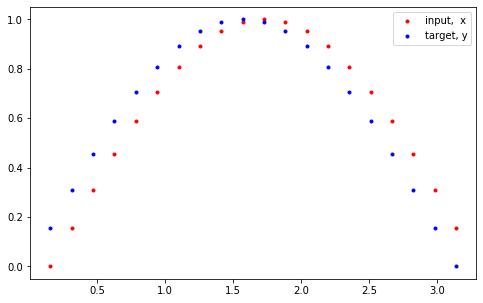

In [6]:
plt.figure(figsize=(8, 5))

# 序列数据
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))

x = data[:-1]  # 数据
y = data[1:]  # 标签

# 图示数据
plt.plot(time_steps[1:], x, 'r.', label='input,  x')
plt.plot(time_steps[1:], y, 'b.', label='target, y')

plt.legend(loc='best')
plt.show()

### 定义模型

In [7]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        batch_size = x.size(0)
        r_out, hidden = self.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)
        output = self.fc(r_out)
        return output, hidden

In [8]:
# 检测正确建模
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

test_input = torch.Tensor(data).unsqueeze(0)
print('Input size:', test_input.size())

test_out, test_h = test_rnn(test_input, None)
print('Output size:', test_out.size())
print('Hidden state size:', test_h.size())

Input size: torch.Size([1, 21, 1])
Output size: torch.Size([21, 1])
Hidden state size: torch.Size([2, 1, 10])


### 训练模型

In [9]:
# 参数
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

In [10]:
# 初始化模型
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [11]:
# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [15]:
# 训练模型
def train(rnn, n_steps, print_every):
    hidden = None
    for batch_i, step in enumerate(range(n_steps)):
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)

        # 前向推理
        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data

        # 损失函数
        loss = criterion(prediction, y_tensor)

        # 梯度归零
        optimizer.zero_grad()

        # 反向传播
        loss.backward()

        # 更新梯度
        optimizer.step()

        if batch_i % print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
            plt.show()
    return rnn

Loss:  0.40589970350265503


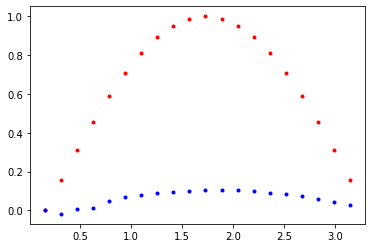

Loss:  0.035483404994010925


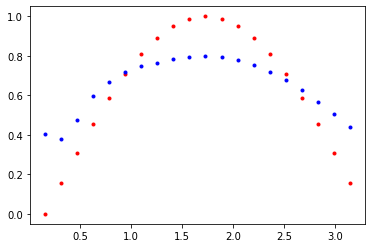

Loss:  0.012853428721427917


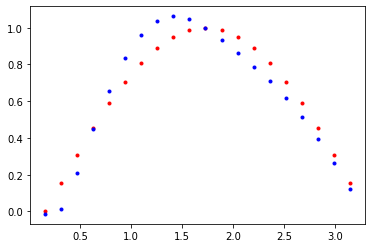

Loss:  0.00824706070125103


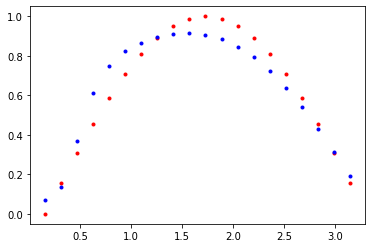

Loss:  0.010340889915823936


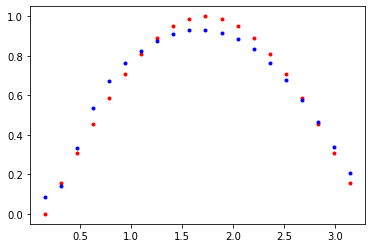

In [16]:
n_steps = 75
print_every = 15

# 训练
trained_rnn = train(rnn, n_steps, print_every)

# `RNN`示例：字符级文本生成

![](images/charseq.jpeg)

In [17]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

## 数据集

In [20]:
with open('datasets/anna.txt', 'r') as f:
    text = f.read()
    
text[:100]    

'Chapter 1\n\n\nHappy families are all alike; every unhappy family is unhappy in its own\nway.\n\nEverythin'

In [22]:
# 文本向量化

chars = tuple(set(text))
int2char = dict(enumerate(chars))
char2int = {ch: ii for ii, ch in int2char.items()}

encoded = np.array([char2int[ch] for ch in text])
encoded[:20]

array([77, 41, 28, 66,  7, 21, 47, 58,  4, 35, 35, 35, 23, 28, 66, 66, 31,
       58,  9, 28])

## 数据预处理

In [26]:
def one_hot_encode(arr, n_labels):
    one_hot = np.zeros((arr.size, n_labels), dtype=np.float32)
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.
    one_hot = one_hot.reshape((*arr.shape, n_labels))
    return one_hot

In [27]:
test_seq = np.array([[3, 5, 1]])
one_hot = one_hot_encode(test_seq, 8)
print(one_hot)

[[[0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0.]]]


In [33]:
# 创建批量数据
def get_batches(arr, batch_size, seq_length):

    batch_size_total = batch_size * seq_length
    n_batches = len(arr) // batch_size_total
    arr = arr[:n_batches * batch_size_total]

    arr = arr.reshape((batch_size, -1))
    for n in range(0, arr.shape[1], seq_length):
        x = arr[:, n:n + seq_length]
        y = np.zeros_like(x)
        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n + seq_length]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y


batches = get_batches(encoded, 8, 50)
x, y = next(batches)
print('x\n', x[:4, :10])
print('\ny\n', y[:4, :10])

x
 [[77 41 28 66  7 21 47 58  4 35]
 [39 81 37 58  7 41 28  7 58 28]
 [21 37 67 58 81 47 58 28 58  9]
 [39 58  7 41 21 58 11 41 12 21]]

y
 [[41 28 66  7 21 47 58  4 35 35]
 [81 37 58  7 41 28  7 58 28  7]
 [37 67 58 81 47 58 28 58  9 81]
 [58  7 41 21 58 11 41 12 21  9]]


## 创建模型

In [34]:
# gpu 可用
train_on_gpu = torch.cuda.is_available()
if (train_on_gpu):
    print('Training on GPU!')
else:
    print(
        'No GPU available, training on CPU; consider making n_epochs very small.'
    )

Training on GPU!


In [38]:
# 创建模型
class CharRNN(nn.Module):
    def __init__(self,
                 tokens,
                 n_hidden=256,
                 n_layers=2,
                 drop_prob=0.5,
                 lr=0.001):
        super(CharRNN, self).__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr

        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}

        self.lstm = nn.LSTM(len(self.chars),
                            n_hidden,
                            n_layers,
                            dropout=drop_prob,
                            batch_first=True)

        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(n_hidden, len(self.chars))

    def forward(self, x, hidden):
        r_output, hidden = self.lstm(x, hidden)
        out = self.dropout(r_output)
        out = out.contiguous().view(-1, self.n_hidden)
        out = self.fc(out)
        return out, hidden

    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data

        if train_on_gpu:
            hidden = (weight.new(self.n_layers, batch_size,
                                 self.n_hidden).zero_().cuda(),
                      weight.new(self.n_layers, batch_size,
                                 self.n_hidden).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size,
                                 self.n_hidden).zero_(),
                      weight.new(self.n_layers, batch_size,
                                 self.n_hidden).zero_())
        return hidden

## 训练模型

In [39]:
def train(net,
          data,
          epochs=10,
          batch_size=10,
          seq_length=10,
          lr=0.001,
          clip=5,
          val_frac=0.1,
          print_every=10):
    net.train()

    opt = torch.optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    val_idx = int(len(data) * (1 - val_frac))
    data, val_data = data[:val_idx], data[val_idx:]

    if train_on_gpu:
        net.cuda()

    counter = 0
    n_chars = len(net.chars)

    for e in range(epochs):
        h = net.init_hidden(batch_size)

        for x, y in get_batches(data, batch_size, seq_length):
            counter += 1

            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)

            if train_on_gpu:
                inputs, targets = inputs.cuda(), targets.cuda()

            h = tuple([each.data for each in h])

            net.zero_grad()

            output, h = net(inputs, h)

            loss = criterion(output,
                             targets.view(batch_size * seq_length).long())
            loss.backward()
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            opt.step()

            if counter % print_every == 0:
                val_h = net.init_hidden(batch_size)
                val_losses = []
                net.eval()
                for x, y in get_batches(val_data, batch_size, seq_length):
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)

                    val_h = tuple([each.data for each in val_h])

                    inputs, targets = x, y
                    if (train_on_gpu):
                        inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(
                        output,
                        targets.view(batch_size * seq_length).long())

                    val_losses.append(val_loss.item())

                net.train()

                print("Epoch: {}/{}...".format(e + 1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))

In [40]:
n_hidden = 512
n_layers = 2

net = CharRNN(chars, n_hidden, n_layers)
print(net)

CharRNN(
  (lstm): LSTM(83, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=83, bias=True)
)


In [41]:
batch_size = 128
seq_length = 100
n_epochs = 20

train(net,
      encoded,
      epochs=n_epochs,
      batch_size=batch_size,
      seq_length=seq_length,
      lr=0.001,
      print_every=10)

Epoch: 1/20... Step: 10... Loss: 3.2684... Val Loss: 3.2099
Epoch: 1/20... Step: 20... Loss: 3.1553... Val Loss: 3.1399
Epoch: 1/20... Step: 30... Loss: 3.1438... Val Loss: 3.1250
Epoch: 1/20... Step: 40... Loss: 3.1109... Val Loss: 3.1204
Epoch: 1/20... Step: 50... Loss: 3.1416... Val Loss: 3.1175
Epoch: 1/20... Step: 60... Loss: 3.1164... Val Loss: 3.1145
Epoch: 1/20... Step: 70... Loss: 3.1047... Val Loss: 3.1109
Epoch: 1/20... Step: 80... Loss: 3.1169... Val Loss: 3.1029
Epoch: 1/20... Step: 90... Loss: 3.1012... Val Loss: 3.0809
Epoch: 1/20... Step: 100... Loss: 3.0419... Val Loss: 3.0239
Epoch: 1/20... Step: 110... Loss: 2.9835... Val Loss: 2.9680
Epoch: 1/20... Step: 120... Loss: 2.8329... Val Loss: 2.8223
Epoch: 1/20... Step: 130... Loss: 2.8383... Val Loss: 2.8556
Epoch: 2/20... Step: 140... Loss: 2.7164... Val Loss: 2.6663
Epoch: 2/20... Step: 150... Loss: 2.6229... Val Loss: 2.5753
Epoch: 2/20... Step: 160... Loss: 2.5504... Val Loss: 2.5114
Epoch: 2/20... Step: 170... Loss:

Epoch: 10/20... Step: 1350... Loss: 1.3931... Val Loss: 1.4213
Epoch: 10/20... Step: 1360... Loss: 1.3841... Val Loss: 1.4259
Epoch: 10/20... Step: 1370... Loss: 1.3755... Val Loss: 1.4218
Epoch: 10/20... Step: 1380... Loss: 1.4250... Val Loss: 1.4148
Epoch: 10/20... Step: 1390... Loss: 1.4314... Val Loss: 1.4170
Epoch: 11/20... Step: 1400... Loss: 1.4284... Val Loss: 1.4185
Epoch: 11/20... Step: 1410... Loss: 1.4427... Val Loss: 1.4147
Epoch: 11/20... Step: 1420... Loss: 1.4309... Val Loss: 1.4073
Epoch: 11/20... Step: 1430... Loss: 1.3992... Val Loss: 1.4105
Epoch: 11/20... Step: 1440... Loss: 1.4362... Val Loss: 1.4060
Epoch: 11/20... Step: 1450... Loss: 1.3561... Val Loss: 1.4054
Epoch: 11/20... Step: 1460... Loss: 1.3756... Val Loss: 1.4073
Epoch: 11/20... Step: 1470... Loss: 1.3766... Val Loss: 1.4047
Epoch: 11/20... Step: 1480... Loss: 1.3972... Val Loss: 1.3992
Epoch: 11/20... Step: 1490... Loss: 1.3747... Val Loss: 1.3967
Epoch: 11/20... Step: 1500... Loss: 1.3645... Val Loss:

Epoch: 20/20... Step: 2660... Loss: 1.2336... Val Loss: 1.2819
Epoch: 20/20... Step: 2670... Loss: 1.2329... Val Loss: 1.2765
Epoch: 20/20... Step: 2680... Loss: 1.2183... Val Loss: 1.2775
Epoch: 20/20... Step: 2690... Loss: 1.2269... Val Loss: 1.2758
Epoch: 20/20... Step: 2700... Loss: 1.2301... Val Loss: 1.2785
Epoch: 20/20... Step: 2710... Loss: 1.1988... Val Loss: 1.2817
Epoch: 20/20... Step: 2720... Loss: 1.2052... Val Loss: 1.2792
Epoch: 20/20... Step: 2730... Loss: 1.1917... Val Loss: 1.2770
Epoch: 20/20... Step: 2740... Loss: 1.1990... Val Loss: 1.2773
Epoch: 20/20... Step: 2750... Loss: 1.1967... Val Loss: 1.2780
Epoch: 20/20... Step: 2760... Loss: 1.1961... Val Loss: 1.2748
Epoch: 20/20... Step: 2770... Loss: 1.2353... Val Loss: 1.2739
Epoch: 20/20... Step: 2780... Loss: 1.2497... Val Loss: 1.2741


## 获取最优模型

- 过拟合与欠拟合
    - 实时监控训练和验证损失，如果训练损失远远低于验证损失，则模型过拟合；添加正则化、`dropout`，或使用更小的模型；
    - 如果训练和验证损失相近，则过拟合，可以增加模型的尺寸
       
    
- 超参数    
    - 模型定义时：隐藏层神经元数量`n_hidden`，`LSTM`的层数`n_layers`
        - `n_layers`建议设置值2或3，模型的总参数量与训练数据量处于同样的量级；如100MB的数据，当模型150K参数，模型会严重欠拟合，而10MB数量模型10M参数，模型会欠拟合，增大`dropout`参数
        - **总是训练较大的模型，然后尝试不同的`dropout`**
    - 模型训练时：`batch_size`,`seq_length`,`lr`,及数据拆分为训练集及验证集的拆分比列
        - 尝试不同的超参数组合，选择性能最佳模型

## 保存模型

In [ ]:
model_name = 'rnn_20_epoch.net'

checkpoint = {'n_hidden': net.n_hidden,
              'n_layers': net.n_layers,
              'state_dict': net.state_dict(),
              'tokens': net.chars}

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)

## 文本生成

In [42]:
def predict(net, char, h=None, top_k=None):
        # tensor inputs
        x = np.array([[net.char2int[char]]])
        x = one_hot_encode(x, len(net.chars))
        inputs = torch.from_numpy(x)
        
        if(train_on_gpu):
            inputs = inputs.cuda()
        
        # detach hidden state from history
        h = tuple([each.data for each in h])
        # get the output of the model
        out, h = net(inputs, h)

        # get the character probabilities
        p = F.softmax(out, dim=1).data
        if(train_on_gpu):
            p = p.cpu() # move to cpu
        
        # topK采样
        if top_k is None:
            top_ch = np.arange(len(net.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()
        
        # select the likely next character with some element of randomness
        p = p.numpy().squeeze()
        char = np.random.choice(top_ch, p=p/p.sum())
        
        # return the encoded value of the predicted char and the hidden state
        return net.int2char[char], h

In [44]:
# 文本生成
def sample(net, size, prime='The', top_k=None):

    if (train_on_gpu):
        net.cuda()
    else:
        net.cpu()

    net.eval()  # eval mode

    # First off, run through the prime characters
    chars = [ch for ch in prime]
    h = net.init_hidden(1)
    for ch in prime:
        char, h = predict(net, ch, h, top_k=top_k)

    chars.append(char)

    # Now pass in the previous character and get a new one
    for ii in range(size):
        char, h = predict(net, chars[-1], h, top_k=top_k)
        chars.append(char)

    return ''.join(chars)

print(sample(net, 1000, prime='Anna', top_k=5))

Anna
with a smile to holding a person was, and a line white sheel, who
did not know. His father was a long while, and her friend, and the
secundes, time and some of or that some made a dress so as happy, and
to see it. To her that he was not finished, he went into the same
time, the princess had always taken up to the corridor, was in which
the prevent position he was an expression to the table, and she could
do to triem to herself what they seemed to the cletched of the
coup of the sick man are a sinting state of charming head, was not to
such her for his brother's woman that when they were since he was sitting to
the soft might have been seening that her family and with the proviss,
which she had been set off the same thing, who had been disagreeable
and had sore of the propersy of always. And he set her. He spoke tran
out of the stranger and her husband who had no supported
that he had not heard the face of her starts, began to say, the pissons were
far in shame, and her heart, thei